<a href="https://colab.research.google.com/github/DanielaJim07/INVESTIGACION_OPERAC/blob/main/Networkx_TAREA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NETWORKX

04/09/25

Es una librería de Python diseñada para la creación, manipulación y análisis de grafos y redes complejas.

+Un grafo es una estructura matemática compuesta por:

+Nodos (o vértices): representan entidades (personas, ciudades, computadoras, etc.).

+Aristas (o edges):representan relaciones entre nodos (amistades, rutas, conexiones, etc.).

El análisis de redes, también conocido como ciencia de redes o teoría de grafos, es el estudio de sistemas complejos compuestos por entidades interconectadas. Con el auge del big data, el análisis de redes ha cobrado cada vez más importancia en diversos campos, como las ciencias sociales, la biología, las finanzas y la informática. Este artículo introduce, mediante de un ejemplo, los conceptos básicos del análisis de redes y su visualización. Se muestra cómo crear y manipular redes, medir sus propiedades y descubrir comunidades y patrones.

##Características


-Crear grafos dirigidos o no dirigidos.

-Añadir atributos a nodos y aristas (ej. pesos, etiquetas).

-Calcular medidas de redes: centralidad, conectividad, clustering, caminos más cortos, etc.

-Visualizar grafos con matplotlib o integrarlo con otras librerías gráficas.

###Libreria

1. Primero importamos la libreria "networkx" que la llamaremos con "nx"

In [3]:
import networkx as nx

###Creación de la red

2. Nombramos al grafo G

In [4]:
G=nx.DiGraph()

Al diagrama añadimos los nodos "A" y "B", con una distancia de 2

In [5]:
G.add_edge("A","B", capacity=2)

Una parte fundamental del análisis de redes es la exploración gráfica.Visualizamos el diagrama con:

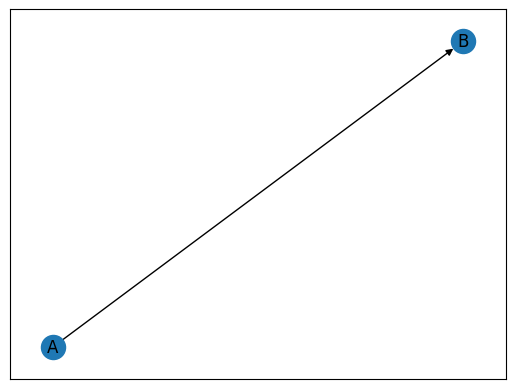

In [6]:
nx.draw_networkx(G)

Se agregan al Diagrama los demas nodos y sus arcos



In [7]:
G.add_edge("B","C",capacity=2)
G.add_edge("C","D",capacity=2)
G.add_edge("B","D",capacity=2)
G.add_edge("A","C",capacity=2)

Ahora visualiamos el diagrama completo:

(agregando un color a los nodos)

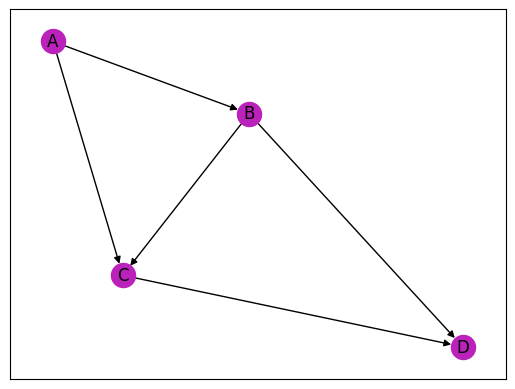

In [9]:
nx.draw_networkx(G,node_color='#bb22bb')

Se pueden consultar los vértices y las aristas de una gráfica mediante los atributos nodes y edges respectivamente.

In [10]:
nx.nodes(G)

NodeView(('A', 'B', 'C', 'D'))

In [11]:
nx.edges(G)

OutEdgeView([('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'D'), ('C', 'D')])

In [14]:
nx.number_of_nodes(G) #NUMERO DE NODOS

4

Podemos examinar los nodos y las aristas. Con: G.nodes, G.edges, G.adjy G.degree. Estas son vistas de conjunto de los nodos, aristas, vecinos (adyacencias) y grados de los nodos en un grafo. Ofrecen una vista de solo lectura continuamente actualizada de la estructura del grafo. También son similares a los diccionarios, ya que permiten consultar los atributos de datos de nodos y aristas a través de las vistas e iterar con los atributos de datos mediante los métodos .items(), .data(). Si se desea un tipo de contenedor específico en lugar de una vista, se puede especificar uno

###Grado
El grado (degree) es una medida sencilla que se basa en el número de enlaces que tiene un nodo. Acorde a esta métrica, los nodos con un alto grado de centralidad son los que están conectados directamente a muchos otros nodos de la red.

In [16]:
grado=nx.degree(G)
grado


DiDegreeView({'A': 2, 'B': 3, 'C': 3, 'D': 2})